In [69]:
import pandas as pd
import numpy as np
import random

df = pd.DataFrame(
                  [
                      [7.0, 80, 0],
                      [7.5, 85, 1],
                      [7.10,100, 1],
                      [5.5, 95, 0],
                      [6.32, 75, 1],
                      [6.82,78, 1],
                      [8.5, 90, 0],
                      [9.10, 95, 1]
                   ], columns = ['cgpa',	'iq',	'placement']
)

df

,cgpa,iq,placement
0,7.00,80,0
1,7.50,85,1
2,7.10,100,1
3,5.50,95,0
4,6.32,75,1
5,6.82,78,1
6,8.50,90,0
7,9.10,95,1


In [71]:
# initial prediction

df['pre1(log-odds)'] = np.log(5/3)
df

,cgpa,iq,placement,pre1(log-odds)
0,7.00,80,0,0.510826
1,7.50,85,1,0.510826
2,7.10,100,1,0.510826
3,5.50,95,0,0.510826
4,6.32,75,1,0.510826
5,6.82,78,1,0.510826
6,8.50,90,0,0.510826
7,9.10,95,1,0.510826


In [72]:
# convert log odds to probability
df['pre1(probability)'] = 1/(1+np.exp(-np.log(5/3)))
df

,cgpa,iq,placement,pre1(log-odds),pre1(probability)
0,7.00,80,0,0.510826,0.625
1,7.50,85,1,0.510826,0.625
2,7.10,100,1,0.510826,0.625
3,5.50,95,0,0.510826,0.625
4,6.32,75,1,0.510826,0.625
5,6.82,78,1,0.510826,0.625
6,8.50,90,0,0.510826,0.625
7,9.10,95,1,0.510826,0.625


In [73]:
# calculating residual for stage 1
df['res1'] = df['placement'] - df['pre1(probability)']
df

,cgpa,iq,placement,pre1(log-odds),pre1(probability),res1
0,7.00,80,0,0.510826,0.625,-0.625
1,7.50,85,1,0.510826,0.625,0.375
2,7.10,100,1,0.510826,0.625,0.375
3,5.50,95,0,0.510826,0.625,-0.625
4,6.32,75,1,0.510826,0.625,0.375
5,6.82,78,1,0.510826,0.625,0.375
6,8.50,90,0,0.510826,0.625,-0.625
7,9.10,95,1,0.510826,0.625,0.375


In [74]:
# training the first decision tree
from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg1.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

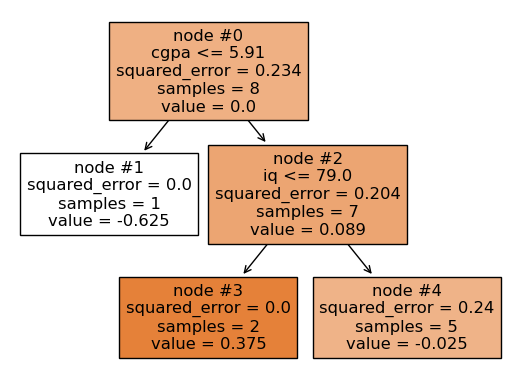

In [75]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(reg1, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

In [76]:
df['leaf_entry1'] = reg1.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,placement,pre1(log-odds),pre1(probability),res1,leaf_entry1
0,7.00,80,0,0.510826,0.625,-0.625,4
1,7.50,85,1,0.510826,0.625,0.375,4
2,7.10,100,1,0.510826,0.625,0.375,4
3,5.50,95,0,0.510826,0.625,-0.625,1
4,6.32,75,1,0.510826,0.625,0.375,3
5,6.82,78,1,0.510826,0.625,0.375,3
6,8.50,90,0,0.510826,0.625,-0.625,4
7,9.10,95,1,0.510826,0.625,0.375,4


In [77]:
def return_logs(leaf):
  temp_df = df[df['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()

  den = sum(temp_df['pre1(probability)'] * (1 - temp_df['pre1(probability)']))
  return round(num/den,2)

In [78]:
df['pre2(log-odds)'] = df['pre1(log-odds)'] + df['leaf_entry1'].apply(return_logs)

In [79]:
df['pre2(probability)'] = 1/(1+np.exp(-df['pre2(log-odds)']))
df

,cgpa,iq,placement,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability)
0,7.00,80,0,0.510826,0.625,-0.625,4,0.400826,0.598886
1,7.50,85,1,0.510826,0.625,0.375,4,0.400826,0.598886
2,7.10,100,1,0.510826,0.625,0.375,4,0.400826,0.598886
3,5.50,95,0,0.510826,0.625,-0.625,1,-2.159174,0.103477
4,6.32,75,1,0.510826,0.625,0.375,3,2.110826,0.891951
5,6.82,78,1,0.510826,0.625,0.375,3,2.110826,0.891951
6,8.50,90,0,0.510826,0.625,-0.625,4,0.400826,0.598886
7,9.10,95,1,0.510826,0.625,0.375,4,0.400826,0.598886


In [61]:
df['res2'] = df['placement'] - df['pre2(probability)']
df

,cgpa,iq,placement,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2
0,7.00,80,0,0.510826,0.625,-0.625,4,0.400826,0.598886,-0.598886
1,7.50,85,1,0.510826,0.625,0.375,4,0.400826,0.598886,0.401114
2,7.10,100,1,0.510826,0.625,0.375,4,0.400826,0.598886,0.401114
3,5.50,95,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477
4,6.32,75,1,0.510826,0.625,0.375,3,2.110826,0.891951,0.108049
5,6.82,78,1,0.510826,0.625,0.375,3,2.110826,0.891951,0.108049
6,8.50,90,0,0.510826,0.625,-0.625,4,0.400826,0.598886,-0.598886
7,9.10,95,1,0.510826,0.625,0.375,4,0.400826,0.598886,0.401114


In [62]:
reg2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg2.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

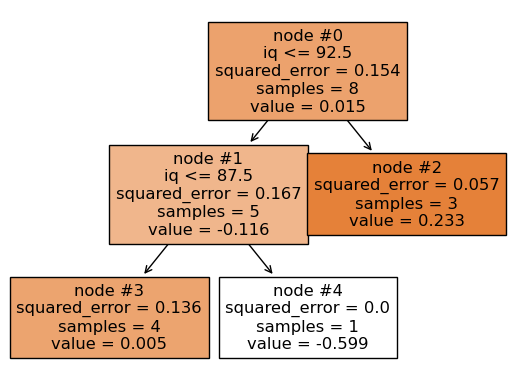

In [63]:
plot_tree(reg2, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

In [64]:
df['leaf_entry2'] = reg2.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,placement,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2
0,7.00,80,0,0.510826,0.625,-0.625,4,0.400826,0.598886,-0.598886,3
1,7.50,85,1,0.510826,0.625,0.375,4,0.400826,0.598886,0.401114,3
2,7.10,100,1,0.510826,0.625,0.375,4,0.400826,0.598886,0.401114,2
3,5.50,95,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477,2
4,6.32,75,1,0.510826,0.625,0.375,3,2.110826,0.891951,0.108049,3
5,6.82,78,1,0.510826,0.625,0.375,3,2.110826,0.891951,0.108049,3
6,8.50,90,0,0.510826,0.625,-0.625,4,0.400826,0.598886,-0.598886,4
7,9.10,95,1,0.510826,0.625,0.375,4,0.400826,0.598886,0.401114,2


In [65]:
def return_logs(leaf):
  num = df[df['leaf_entry2'] == leaf]['res2'].sum()
  den = sum(df[df['leaf_entry2'] == leaf]['pre2(probability)'] * (1 - df[df['leaf_entry2'] == leaf]['pre2(probability)']))
  return round(num/den,2)

In [66]:
df['pre3(log-odds)'] = df['pre1(log-odds)'] + df['pre2(log-odds)'] + df['leaf_entry2'].apply(return_logs)

In [67]:
df['pre3(probability)'] = 1/(1+np.exp(-df['pre3(log-odds)']))
df

,cgpa,iq,placement,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2,pre3(log-odds),pre3(probability)
0,7.00,80,0,0.510826,0.625,-0.625,4,0.400826,0.598886,-0.598886,3,0.941651,0.719433
1,7.50,85,1,0.510826,0.625,0.375,4,0.400826,0.598886,0.401114,3,0.941651,0.719433
2,7.10,100,1,0.510826,0.625,0.375,4,0.400826,0.598886,0.401114,2,2.131651,0.893942
3,5.50,95,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477,2,-0.428349,0.394521
4,6.32,75,1,0.510826,0.625,0.375,3,2.110826,0.891951,0.108049,3,2.651651,0.934113
5,6.82,78,1,0.510826,0.625,0.375,3,2.110826,0.891951,0.108049,3,2.651651,0.934113
6,8.50,90,0,0.510826,0.625,-0.625,4,0.400826,0.598886,-0.598886,4,-1.578349,0.171029
7,9.10,95,1,0.510826,0.625,0.375,4,0.400826,0.598886,0.401114,2,2.131651,0.893942


In [68]:
df['res_final'] = df['placement'] - df['pre3(probability)']

df[['res1','res2','res_final']]

,res1,res2,res_final
0,-0.625,-0.598886,-0.719433
1,0.375,0.401114,0.280567
2,0.375,0.401114,0.106058
3,-0.625,-0.103477,-0.394521
4,0.375,0.108049,0.065887
5,0.375,0.108049,0.065887
6,-0.625,-0.598886,-0.171029
7,0.375,0.401114,0.106058
